In [25]:
import kornia_rs
import tensorflow as tf
import cv2
import PIL

print("Kornia-rs: " + kornia_rs.__version__)
print("Tensorflow: " + tf.__version__)
print("OpenCV: " + cv2.__version__)
print("PIL/Pillow: " + PIL.__version__)

Kornia-rs: 0.1.9-rc.3
Tensorflow: 2.19.0
OpenCV: 4.11.0
PIL/Pillow: 11.2.1


In [26]:
# JPEG Decoding

import io
from PIL import Image
import numpy as np
import timeit

N = 5000

with open("data/720p.jpeg", "rb") as f:
    image_720p = f.read()

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = f.read()

with open("data/2k.jpeg", "rb") as f:
    image_2k = f.read()

with open("data/4k.jpeg", "rb") as f:
    image_4k = f.read()

# ============================
# Kornia-rs
# ============================
#
# Turbojpeg
def load_with_kornia_rs_720p():
    np.array(kornia_rs.decode_image_jpeg(image_720p, "rgb"))

def load_with_kornia_rs_1080p():
    np.array(kornia_rs.decode_image_jpeg(image_1080p, "rgb"))

def load_with_kornia_rs_2k():
    np.array(kornia_rs.decode_image_jpeg(image_2k, "rgb"))

def load_with_kornia_rs_4k():
    np.array(kornia_rs.decode_image_jpeg(image_4k, "rgb"))

# Raw Jpeg
# def load_with_kornia_rs_raw_720p():
#     kornia_rs.decode_image_raw_jpeg(image_720p, [720, 1280], "rgb")

# def load_with_kornia_rs_raw_1080p():
#     kornia_rs.decode_image_raw_jpeg(image_1080p, [1080, 1920], "rgb")

# def load_with_kornia_rs_raw_2k():
#     kornia_rs.decode_image_raw_jpeg(image_2k, [1440, 2560], "rgb")

# def load_with_kornia_rs_raw_4k():
#     kornia_rs.decode_image_raw_jpeg(image_4k, [2160, 3840], "rgb")

# ============================
# PIL
# ============================
def load_with_pil_720p():
    np.array(Image.open(io.BytesIO(image_720p)))

def load_with_pil_1080p():
    np.array(Image.open(io.BytesIO(image_1080p)))

def load_with_pil_2k():
    np.array(Image.open(io.BytesIO(image_2k)))

def load_with_pil_4k():
    np.array(Image.open(io.BytesIO(image_4k)))

# ============================
# TensorFlow
# ============================
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

def load_with_tf_720p():
    np.array(tf.io.decode_image(image_720p, channels=3))

def load_with_tf_1080p():
    np.array(tf.io.decode_image(image_1080p, channels=3))

def load_with_tf_2k():
    np.array(tf.io.decode_image(image_2k, channels=3))

def load_with_tf_4k():
    np.array(tf.io.decode_image(image_4k, channels=3))

# ============================
# OpenCV
# ============================
cv2.setNumThreads(1)

def load_with_cv2_720p():
    np.array(cv2.imdecode(np.frombuffer(image_720p, np.uint8), cv2.IMREAD_COLOR))

def load_with_cv2_1080p():
    np.array(cv2.imdecode(np.frombuffer(image_1080p, np.uint8), cv2.IMREAD_COLOR))

def load_with_cv2_2k():
    np.array(cv2.imdecode(np.frombuffer(image_2k, np.uint8), cv2.IMREAD_COLOR))

def load_with_cv2_4k():
    np.array(cv2.imdecode(np.frombuffer(image_4k, np.uint8), cv2.IMREAD_COLOR))

kornia_rs_720p = timeit.timeit(load_with_kornia_rs_720p, number=N) / N * 1e3
kornia_rs_1080p = timeit.timeit(load_with_kornia_rs_1080p, number=N) / N * 1e3
kornia_rs_2k = timeit.timeit(load_with_kornia_rs_2k, number=N) / N * 1e3
kornia_rs_4k = timeit.timeit(load_with_kornia_rs_4k, number=N) / N * 1e3

# kornia_rs_raw_720p = timeit.timeit(load_with_kornia_rs_raw_720p, number=N) / N * 1e3
# kornia_rs_raw_1080p = timeit.timeit(load_with_kornia_rs_raw_1080p, number=N) / N * 1e3
# kornia_rs_raw_2k = timeit.timeit(load_with_kornia_rs_raw_2k, number=N) / N * 1e3
# kornia_rs_raw_4k = timeit.timeit(load_with_kornia_rs_raw_4k, number=N) / N * 1e3

pil_720p = timeit.timeit(load_with_pil_720p, number=N) / N * 1e3
pil_1080p = timeit.timeit(load_with_pil_1080p, number=N) / N * 1e3
pil_2k = timeit.timeit(load_with_pil_2k, number=N) / N * 1e3
pil_4k = timeit.timeit(load_with_pil_4k, number=N) / N * 1e3

tf_720p = timeit.timeit(load_with_tf_720p, number=N) / N * 1e3
tf_1080p = timeit.timeit(load_with_tf_1080p, number=N) / N * 1e3
tf_2k = timeit.timeit(load_with_tf_2k, number=N) / N * 1e3
tf_4k = timeit.timeit(load_with_tf_4k, number=N) / N * 1e3

cv2_720p = timeit.timeit(load_with_cv2_720p, number=N) / N * 1e3
cv2_1080p = timeit.timeit(load_with_cv2_1080p, number=N) / N * 1e3
cv2_2k = timeit.timeit(load_with_cv2_2k, number=N) / N * 1e3
cv2_4k = timeit.timeit(load_with_cv2_4k, number=N) / N * 1e3

In [27]:
print("kornia_rs 720p = " + str(kornia_rs_720p))
print("kornia_rs 1080p = " + str(kornia_rs_1080p))
print("kornia_rs 2k = " + str(kornia_rs_2k))
print("kornia_rs 4k = " + str(kornia_rs_4k))

# print("kornia_rs Raw 720p = " + str(kornia_rs_raw_720p))
# print("kornia_rs Raw 1080p = " + str(kornia_rs_raw_1080p))
# print("kornia_rs Raw 2k = " + str(kornia_rs_raw_2k))
# print("kornia_rs Raw 4k = " + str(kornia_rs_raw_4k))

print("pil 720p = " + str(pil_720p))
print("pil 1080p = " + str(pil_1080p))
print("pil 2k = " + str(pil_2k))
print("pil 4k = " + str(pil_4k))

print("Tensorflow 720p = " + str(tf_720p))
print("Tensorflow 1080p = " + str(tf_1080p))
print("Tensorflow 2k = " + str(tf_2k))
print("Tensorflow 4k = " + str(tf_4k))

print("OpenCV 720p = " + str(cv2_720p))
print("OpenCV 1080p = " + str(cv2_1080p))
print("OpenCV 2k = " + str(cv2_2k))
print("OpenCV 4k = " + str(cv2_4k))

kornia_rs 720p = 1.583400314000028
kornia_rs 1080p = 3.4241093724000167
kornia_rs 2k = 6.1124758801999635
kornia_rs 4k = 27.244749810400027
pil 720p = 2.1657311486000252
pil 1080p = 5.043803475799996
pil 2k = 9.874743551400025
pil 4k = 51.16187102939994
Tensorflow 720p = 1.3972079434000988
Tensorflow 1080p = 2.9577827389999585
Tensorflow 2k = 5.341022267000153
Tensorflow 4k = 25.401892671000134
OpenCV 720p = 1.4753020896001545
OpenCV 1080p = 3.404018874199937
OpenCV 2k = 5.705999682999936
OpenCV 4k = 27.806737412999972


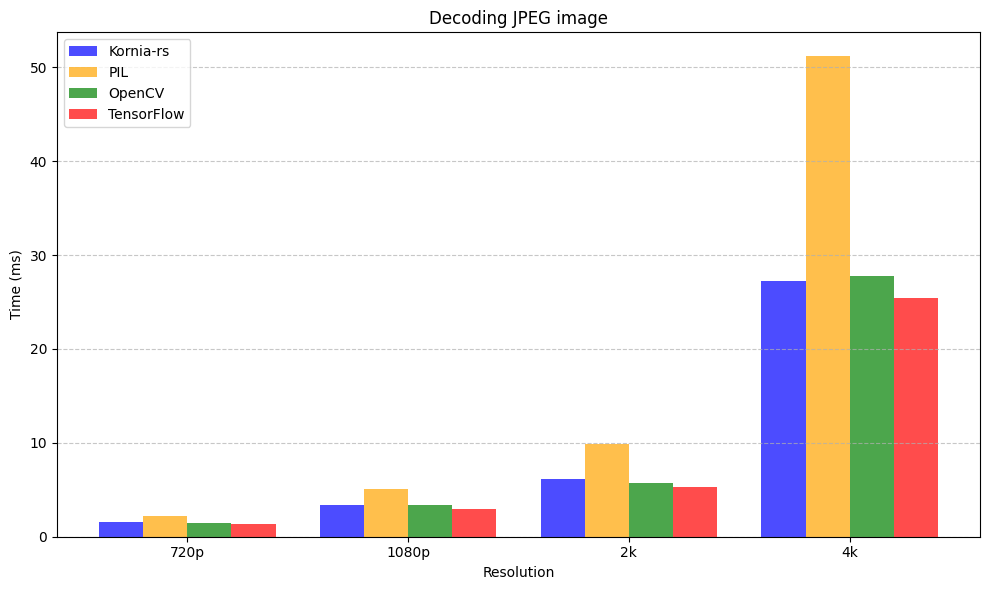

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# Resolutions and average times
resolutions = ['720p', '1080p', '2k', '4k']
kornia_rs_avg = [kornia_rs_720p, kornia_rs_1080p, kornia_rs_2k, kornia_rs_4k]
# kornia_rs_raw_avg = [kornia_rs_raw_720p, kornia_rs_raw_1080p, kornia_rs_raw_2k, kornia_rs_raw_4k]
opencv_avg = [cv2_720p, cv2_1080p, cv2_2k, cv2_4k]
pil_avg = [pil_720p, pil_1080p, pil_2k, pil_4k]
tf_avg = [tf_720p, tf_1080p, tf_2k, tf_4k]

# Bar width and positions
bar_width = 0.20
x = np.arange(len(resolutions))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(x - (1.5 * bar_width), kornia_rs_avg, bar_width, label='Kornia-rs', color='blue', alpha=0.7)
# plt.bar(x - 0.5 * bar_width, kornia_rs_raw_avg, bar_width, label="Kornia-rs Raw JPEG", color="green", alpha=0.7)
plt.bar(x - (0.5 * bar_width), pil_avg, bar_width, label='PIL', color='orange', alpha=0.7)
plt.bar(x + (0.5 * bar_width), opencv_avg, bar_width, label='OpenCV', color='green', alpha=0.7)
plt.bar(x + (1.5 * bar_width), tf_avg, bar_width, label="TensorFlow", color="red", alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Resolution')
plt.ylabel('Time (ms)')
plt.title('Decoding JPEG image')
plt.xticks(x, resolutions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()